#Animaciones
###Notebook de Milton Katz F2-1C2020

No hay que buscar demasiado para encontrar motivaciones para animar cosas en la computadora, en cualquier problema dinámico que nos interese va a ser de mucha utilidad poder visualizarlo, como si hiceramos el experimento pero con la posibilidad de usar condiciones ideales.

Vamos a ver varias maneras de animar, empezando por la más fácil (y fea) y terminando con la más completa, que nos permita quedarnos con un gif para mostrarle a todxs nuestrxs amigxs y presumir lo buenxs que somos programando.

Para empezar importemos las librerías que vamos a necesitar.


In [ ]:
import numpy as np
import matplotlib.pylab as plt
from matplotlib import animation, rc
from IPython.display import HTML;

Como ven tenemos las librerías de siempre, numpy y pyplot y agregamos dos nuevas, animation se imaginan para que es, el nombre es muy descriptivo. Por otra parte, rc y HTML nos permitirán modificar la configuración que tiene matplotlib por default, no voy a entrar demasiado en detalle, prueben no ponerlo y vean que no muestra bien las imágenes. Esto es solo necesario si usan notebooks, si algunx está programando en otra IDE puede no ponerlo.

In [ ]:
rc('animation', html='html5');


Veamos el primer método, voy a usar lo que ya hice en el notebook de [forzado](https://colab.research.google.com/drive/1Y26cm22GFvkxSAIIXOXBjZ3bdtCBcHdq#scrollTo=uwtiU7G9e4vt) para que vean que a lo que ya hice solo le tengo que agregar dos lineas de código. Para esto necesito definir algunas variables antes.

In [ ]:
m=1
F = 1
omega0 = 2
gamma = 0.5
omega = np.linspace(0,10,1000)
B = (F/m)*(omega0**2 - omega**2)/(gamma**2 * omega**2 + (omega0**2 - omega**2)**2)
A = (F/m)*gamma*omega/(gamma**2 * omega**2 + (omega0**2 - omega**2)**2)

La [celda tres](https://colab.research.google.com/drive/1Y26cm22GFvkxSAIIXOXBjZ3bdtCBcHdq#scrollTo=O_nR-x8p2p7Y&line=1&uniqifier=1) del forzado, dice:

```
gamVar = np.linspace(0.6,3.9,10)

for i in range(10):
  Avar = (F/m)*gamVar[i]*omega/(gamVar[i]**2 * omega**2 + (omega0**2 - omega**2)**2)
  plt.figure(0)
  plt.plot(omega,Avar, label = 'Gamma = ' + str(gamVar[i]))
  plt.plot([omega0]*2,[1.1*min(B),1.1*max(A)],'--',color = 'green') 
  plt.text(2.02,1,'$\omega_0$',color = 'green') 
  plt.grid(True,which = 'major')
  plt.xlabel('$\Omega$')
  plt.xlim([0,4]) 

plt.legend(loc = [1,0.3]);
```
A esto le voy a hacer algunos cambios, en primer lugar, en vez de 10 valores de gamVar voy a usar 20, solo para que se vea mejor la animación. Por otro lado, le voy a sacar la leyenda porque es innecesaria para una animación.

Ahora lo necesario para que se vea animado, este código grafica una curva para cada valor de gamVar, siempre sobre la misma figura, pero así escrito va a armar la figura con todas las curvas y después me las va a mostrar. Lo que voy a hacer es pedirle que grafique una curva, me la muestre, espere 0.1 seg, la borre, grafique la siguiente y siga así sucesivamente. Para eso tenemos plt.pause(0.1) (esperá 0.1 seg) y plt.show() (mostrame lo que tenés).

Abajo pueden ver como aparece algo así como una animación pero bastante fea.




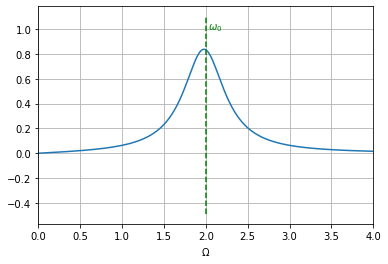

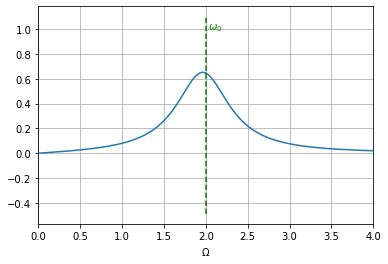

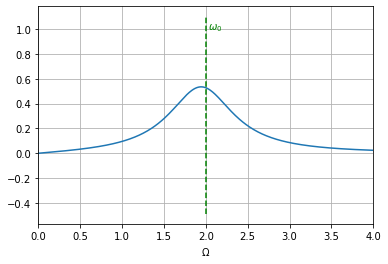

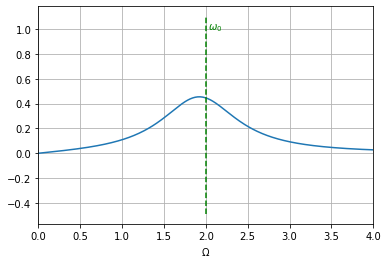

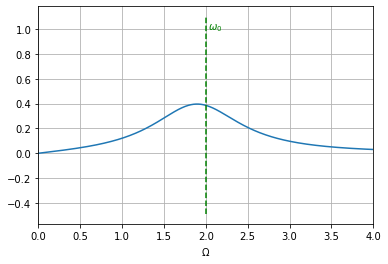

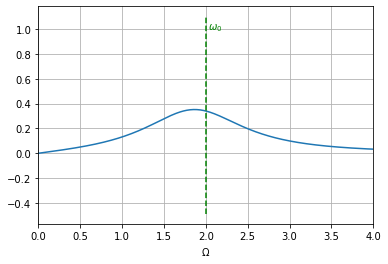

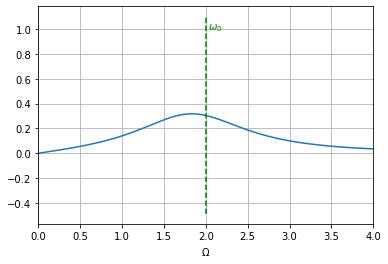

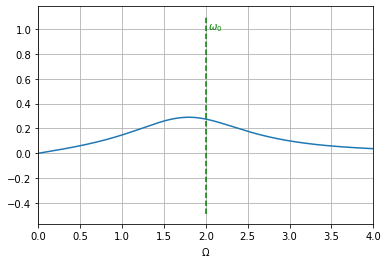

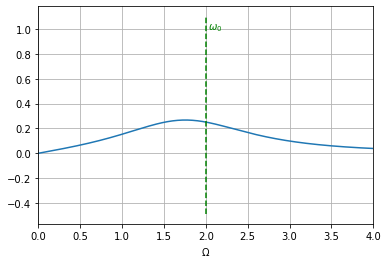

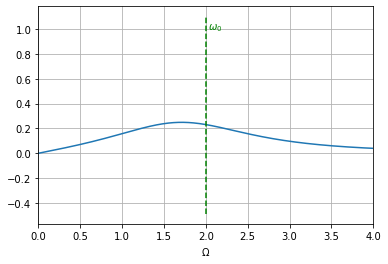

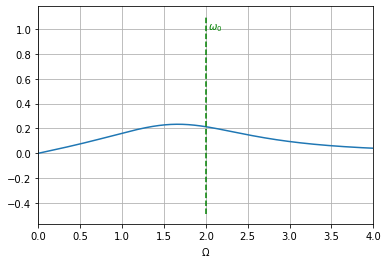

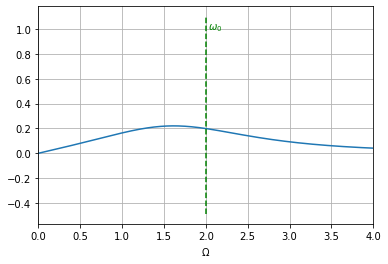

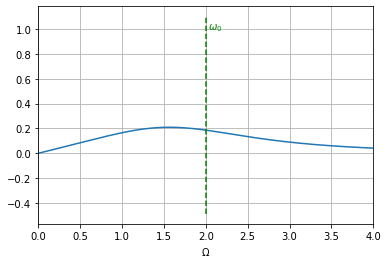

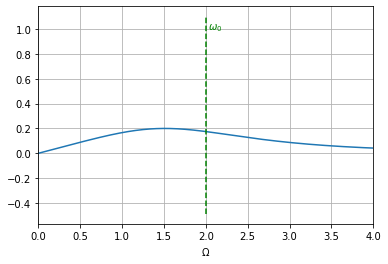

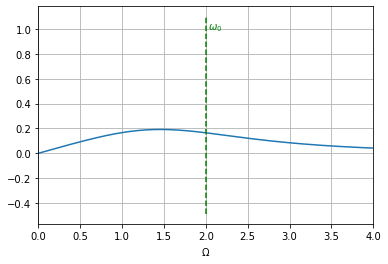

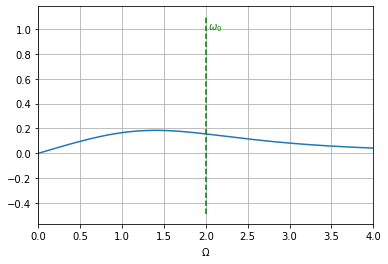

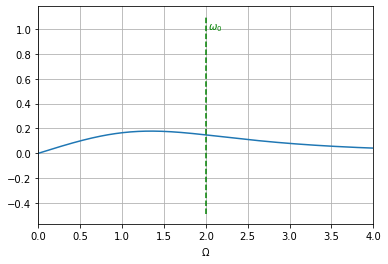

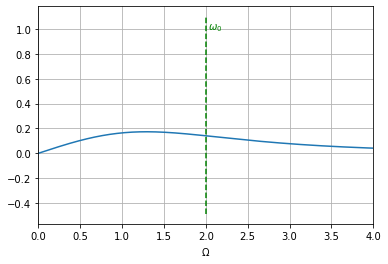

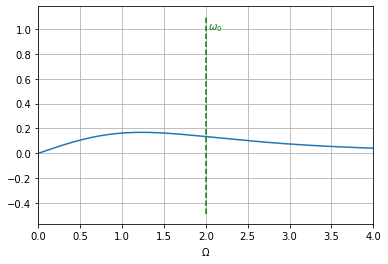

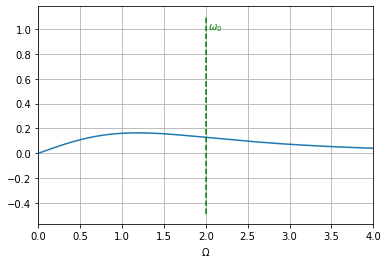

In [ ]:

gamVar = np.linspace(0.6,3.9,20)

for i in range(20):
  Avar = (F/m)*gamVar[i]*omega/(gamVar[i]**2 * omega**2 + (omega0**2 - omega**2)**2)
  plt.figure(0)
  plt.plot(omega,Avar, label = 'Gamma = ' + str(gamVar[i]))
  plt.plot([omega0]*2,[1.1*min(B),1.1*max(A)],'--',color = 'green') 
  plt.text(2.02,1,'$\omega_0$',color = 'green') 
  plt.grid(True,which = 'major')
  plt.xlabel('$\Omega$')
  plt.xlim([0,4]) 
  plt.pause(0.1)
  plt.show()



Como ven aparecieron 20 gráficos uno abajo del otro, que mientras aparecían tenía pinta de animación, aunque el prioducto final terminan siendo 20 gráficos y no se lo puedo mostrar a nadie, pero esta idea básica de mostrar un gráfico después del otro es la que vamos a usar para animar, solo que vamos a necesitar una función que nos compile todo en una figura y que nos permitá guardarla y quedarnosla. Igual este método que puede parecer tonto se puede usar si guardamos cada imágen por separado y usamos otro software para compilar todo en un gif. No es ideal pero tampoco es tan mala idea.

Nota: si esto lo hacemos en una IDE que no sea un Notebook (por ej: spyder) se va a ver la animación hermosa, pero que igualmente solo vamos a poder guardarla como 20 imágenes por separado. Quien se anime puede probarlo, instalar anaconda (paquete genial que incluye TODO lo que necesitamos para programar en python) y dar sus primeros pasos fuera del colab.


Veamos cómo usar la función que les decía que me puede compilar todas las curvas para que se vean en una sola figura. Lo primero que voy a hacer es definir mis ejes donde luego voy a graficar y todo lo que permanezca fijo en el gráfico

Text(2.02, 1, '$\\omega_0$')

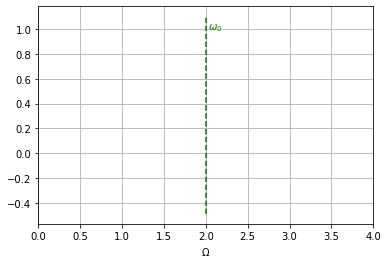

In [ ]:
fig, ax = plt.subplots();
ax.set_xlabel('$\Omega$')
ax.set_xlim([0,4])
ax.grid(True)
ax.plot([omega0]*2,[1.1*min(B),1.1*max(A)],'--',color  = 'green', label = 'Frecuencia propia')
ax.text(2.02,1,'$\omega_0$',color = 'green');

Ahora voy a definir una variable que la voy a llamar linea y va a representar a la curva. Esto es un poco abstracto porque todavía no dije que forma va a tener la curva, cómo puedo guardarla en una variable? La idea es que la curva no es solo el dibujo, tiene un montón de cosas de formato (trazo, color, etc.), todo eso lo voy a definir en la linea y el dibujo propiamente dicho le voy a decir que esté vacío.

In [ ]:
linea, = ax.plot([],[],'-',color = 'b', label = 'Curva de resonancia')

Lo último que voy a definir es una función (si no se acuerdan qué es una función pueden repasarlo [aca](https://colab.research.google.com/drive/1DPNryH9NBg5yfJT_SZ0GqBecTWxJnmDF#scrollTo=bLkPcrDng-Si)) _graficar_ que va a tener dentro una sola iteración de lo que ya hice antes. Es decir, va a graficar uno solo de los 20 gráficos y va a depender del parámetro i que le pase, i me va a decir en qué número de iteración voy a estar. 

En la función vuelvo a definir todo lo que ya había definido y necesito para el gráfico porque quiero que esto funcione con variables internas de la función. Si no lo hacen va a funcionar igual, la función va a ir a buscar las variables del resto del programa si no encuentra las propias pero es más fácil meter la pata y que el programa no funcione, por esto les recomiendo que todo lo que usen en la función esté definido dentro de la función.

In [ ]:
def graficar(i):
  F = 1
  omega0 = 2
  gamma = 0.5
  omega = np.linspace(0,10,1000)
  gamVar = np.linspace(0.6,3.9,20)
  Avar = (F/m)*gamVar[i]*omega/(gamVar[i]**2 * omega**2 + (omega0**2 - omega**2)**2)
  linea.set_data(omega, Avar)
  return (linea,)

Ahora voy a hacer la animación, voy a usar la librería animation de matplotlib que importé al principio. Hagamoslo y después hablamos de como funciona.



In [ ]:
anim = animation.FuncAnimation(fig, graficar, frames=20, interval=100)
anim

#Opcion 1 guardar la animación en gif (necesitan tener instalado el imagemagick)
#anim.save('resonancia.gif', writer='imagemagick')

#Opcion 2 guardar la animación en mp4 (durante mucho tiempo no pude hacer funcionar el imagemagick en mi compu y hacía esto. Después lo convertía a mano en gif con algún programa externo)
#Writer = animation.writers['ffmpeg']
#writer = Writer(fps=20, metadata=dict(artist='Me'), bitrate=1800)
#anim.save('reso.mp4', writer=writer)


Hermoso! hablemos de cómo funciona, usé la función _FuncAnimation_ y le pasé cuatro parámetros: 
  * _fig_ le paso la figura que creé antes para que la usé de base para graficar
  * _graficar_ le paso la función que tiene que repetir una y otra vez para generar el conjunto de imágenes, o sea, internamente FuncAnimations va a hacer el for que habíamos hecho antes
  *_frames_ cuantas imagenes tiene que hacer (el range del for)
  *_interval_ cuánto tiempo tiene que esperar entre imágen e imágen, como lo que poníamos dentro del plt.pause pero en milisegundos en vez de ponerlo en segundos.

Como ven esto lo metí dentro de una variable anim que va a guardar la animación completa, esto me va a servir para después hacer cosas con la animación como por ejemplo guardarla en un gif. Dejé dos formas de guardarlas comentadas, no son las únicas, pueden buscar otras si no les funcionan estas



Veamos otro ejemplo un poco más dificil, tres animaciones en una figura, a la derecha tenemos la curva de resonancia con un puntito que se mueve por ella y nos indica con qué frecuencia forzamos al sistema, en el medio la masa oscilando en el resorte y  a la izquierda la posición de la masa en función del tiempo.

<figure>
<center>
<img src='https://drive.google.com/uc?export=view&id=1tg5Ul7AERtJm93IZVJwf56sEBigjkf4T'  width="" height="200"/>
</center>
</figure>


Veamos el código de estas animaciones, es la misma idea pero haciendo tres animaciones al mismo tiempo, voy a definir tres ejes en vez de 1. Tal como hicimos antes vamos a definir todo lo que va a quedar fijo x3.




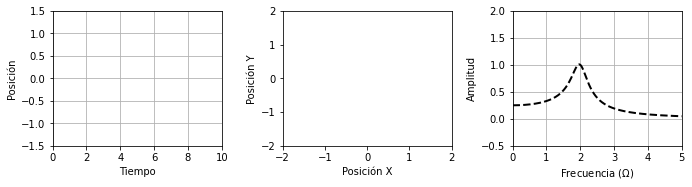

In [ ]:
fig, (axX,axM,axA) = plt.subplots(1,3) #axX contendrá el gráfico de X(t), axM contendrá la imagen de la masita moviendose y axA será el puntito que me manrcará en qué lugar de la curva de amplitud me encuentro

fig.set_size_inches((10,3)) #Seteo el tamaño de la imagen que voy a exportar, dentro de python no sirve para nada pero si después lo guardo si
fig.tight_layout(pad=3.0) #Si tengo varios graficos en una misma figura esto me los separa

axX.set_xlim((0,10)) 
axX.set_ylim((-1.5,1.5))
axX.grid()
axX.set_xlabel('Tiempo')
axX.set_ylabel('Posición')

axM.set_xlim((-2,2))
axM.set_ylim((-2,2))
axM.set_xlabel('Posición X')
axM.set_ylabel('Posición Y')

m=1
F = 1
omega0 = 2
omega = np.linspace(0,5,500)
gamma = 0.5
A = (F/m)*gamma*omega/(gamma**2 * omega**2 + (omega0**2 - omega**2)**2)    
B = (F/m)*(omega0**2 - omega**2)/(gamma**2 * omega**2 + (omega0**2 - omega**2)**2)
axA.set_xlim((0,5))
axA.set_ylim((-.5,2))
axA.set_xlabel('Frecuencia ($\Omega$)')
axA.set_ylabel('Amplitud')
axA.grid()
axA.plot(omega,np.sqrt(A**2 + B**2),lw=2,color = 'k',ls = '--',zorder = 2)

frames = 100; #defino ahora la cantidad de frames que voy a usar porque lo voy a usar para definir muchos de mis arrays

Al igual que antes, defino mis lineas, pero hay algo particular ahora, antes tenía una linea por gráfico, ahora en el del medio tendré dos, uno para la masa y otro para el resorte, por eso, las lineas de la masa y del resorte las voy a definir a partir del mismo ax.




In [ ]:
lineX, = axX.plot([], [], lw=2)
lineM, = axM.plot([], [], 'o',ms = 15,zorder = 3) #la linea con mayor zorder va a quedar más arriba tapando a las de menor zorder, ms es el marker size, el tamaño del puntito
lineRes, = axM.plot([],[],ls = '--',color = 'k', lw = 2, zorder = 2)
lineA, = axA.plot([], [], 'o', ms=10,zorder = 3);

Voy a definir mi función _graficar_ que ahora va a calcular más cosas y devolver más lineas pero la idea es la misma, lean los comentarios que le voy haciendo al código.


In [ ]:
def graficar(i):
    #Defino las constantes útiles
    m=1
    F = 1
    omega0 = 2
    t = np.linspace(0,10,1000) #t lo uso cuando es la variable indepte de una función, tv la uso cuando es un parámetro y lo que animo es un punto
    tv = np.linspace(0,10,frames) #t tiene un tamaño arbitrario porque cada paso de la animación tiene una curva de tamaño t, tv es un parámetro que cambia cada frame al igual que omega y tiene que haber tantos tv como frames
    omega = np.linspace(0.5,3.5,frames)
    gamma = 0.5
    
    #Creo las matrices de mis funciones, cada fila es un frame, me sirven para animar funciones
    X = np.zeros((frames,len(t)))
    A = np.zeros((frames,len(t)))
    B = np.zeros((frames,len(t)))
    
    #Estos son para animar puntos, en cada frame tienen un solo valor, por eso son un vector y no una matriz
    Xv = np.zeros(frames) 
    Av = np.zeros(frames)
    Bv = np.zeros(frames)
    
    #Defino mis funciones explícitamente para cada frame i y se lo asigno al plot
    A[i] += (F/m)*gamma*omega[i]/(gamma**2 * omega[i]**2 + (omega0**2 - omega[i]**2)**2)    
    B[i] += (F/m)*(omega0**2 - omega[i]**2)/(gamma**2 * omega[i]**2 + (omega0**2 - omega[i]**2)**2)
    X[i] += A[i]*np.sin(omega[i]*t) + B[i]*np.cos(omega[i]*t)
    lineX.set_data(t,X[i])
    
    #Defino las coordenadas de mis puntos para cada variable y se los asigno a los plots
    Av[i] += (F/m)*gamma*omega[i]/(gamma**2 * omega[i]**2 + (omega0**2 - omega[i]**2)**2)    
    Bv[i] += (F/m)*(omega0**2 - omega[i]**2)/(gamma**2 * omega[i]**2 + (omega0**2 - omega[i]**2)**2)
    Xv[i] += Av[i]*np.sin(omega[i]*tv[i]) + Bv[i]*np.cos(omega[i]*tv[i])
    
    lineM.set_data(Xv[i],0)
    lineRes.set_data([-2,Xv[i]],[0,0])
    lineA.set_data(omega[i],np.sqrt(A[i]**2 + B[i]**2))
    
    return(lineX,lineM,lineRes,lineA,)



Algo no tan fácil de entender de este código es la diferencia entre t y tv (idem para X y Xv). La variable t la uso cuando la necesito en el eje horizontal, por ejemplo en el primer gráfico, en cambio, en el segundo, la posición de la masita va a depender de en qué tiempo esté pero el tiempo no es ningún eje, ahí voy a usar tv.

Por último uso FuncAnim, cuando lo hice para subir puse 200 frames, tarda bastante pero queda más lindo y como solo lo tenía que usar una vez esperé. Igualmente, mientras hacía el código y quería probar cosas no quería esperar cada vez ni me interesaba que se vea lindo, les propongo que jueguen con el código y para probar cosas bajen la variable frames a 10, cuando quieran un producto final lo vuelvan a subir y esperen el tiempo necesario.

In [ ]:
anim = animation.FuncAnimation(fig,graficar, frames = frames, interval = 50, blit = True)

anim


Ahora les toca a ustedes, se animan a animar? Les propongo que usen estas herramientas para animar una cuerda que se mueve en el modo 2.

<a href="https://drive.google.com/uc?export=view&id=1tg5Ul7AERtJm93IZVJwf56sEBigjkf4T"><img src="https://drive.google.com/uc?export=view&id=1tg5Ul7AERtJm93IZVJwf56sEBigjkf4T" style="width: 500px; max-width: 100%; height: auto" title="Click for the larger version." /></a>


